# Train Final Model

Work that has been done (session 4, session 5)
* Data has been collected, checked for cleanliness, saved as a .csv gestures x 100 time points (with associated metadata)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import random

In [2]:
random_seed = 42
random.seed(random_seed)
FIG_SIZE = (10, 7)

## Load Session 4

In [3]:
s4_meta = pd.read_csv("../session_4/meta_gestures.csv")
s4_meta

,index,date,subject,replicate,noise-level,intent,body orientation,ring,hand,hand rest (stability),...,firebase,time,X_trial,X_num_taps,X_detected_starts,X_extra_starts_in_front,X_extra_starts_in_end,sanity check,trial,gesture_num
0,0,April 2,Gati,1,clean,isolated (wrist),sitting in chair,"2-finger, pointer-index",right,no,...,F0442A72-0E6E-4790-AB16-00940C3D37A7.json,1:39:00 PM,0,78 (missed the first one?),42,2,0,40,0,6
1,1,April 2,Gati,1,clean,isolated (wrist),sitting in chair,"2-finger, pointer-index",right,no,...,F0442A72-0E6E-4790-AB16-00940C3D37A7.json,1:39:00 PM,0,78 (missed the first one?),42,2,0,40,0,4
2,2,April 2,Gati,1,clean,isolated (wrist),sitting in chair,"2-finger, pointer-index",right,no,...,F0442A72-0E6E-4790-AB16-00940C3D37A7.json,1:39:00 PM,0,78 (missed the first one?),42,2,0,40,0,2
3,3,April 2,Gati,1,clean,isolated (wrist),sitting in chair,"2-finger, pointer-index",right,no,...,F0442A72-0E6E-4790-AB16-00940C3D37A7.json,1:39:00 PM,0,78 (missed the first one?),42,2,0,40,0,6
4,4,April 2,Gati,1,clean,isolated (wrist),sitting in chair,"2-finger, pointer-index",right,no,...,F0442A72-0E6E-4790-AB16-00940C3D37A7.json,1:39:00 PM,0,78 (missed the first one?),42,2,0,40,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,April 2,Gati,1,clean,"large, maybe more comfortable (elbow)",sitting in chair,"2-finger, pointer-index",right,"implicitly, for comfort",...,3555E195-07D5-4DBD-AC5B-68C536BB25FE.json,2:49:00 PM,14,79,42,2,0,40,14,9
596,596,April 2,Gati,1,clean,"large, maybe more comfortable (elbow)",sitting in chair,"2-finger, pointer-index",right,"implicitly, for comfort",...,3555E195-07D5-4DBD-AC5B-68C536BB25FE.json,2:49:00 PM,14,79,42,2,0,40,14,4
597,597,April 2,Gati,1,clean,"large, maybe more comfortable (elbow)",sitting in chair,"2-finger, pointer-index",right,"implicitly, for comfort",...,3555E195-07D5-4DBD-AC5B-68C536BB25FE.json,2:49:00 PM,14,79,42,2,0,40,14,2
598,598,April 2,Gati,1,clean,"large, maybe more comfortable (elbow)",sitting in chair,"2-finger, pointer-index",right,"implicitly, for comfort",...,3555E195-07D5-4DBD-AC5B-68C536BB25FE.json,2:49:00 PM,14,79,42,2,0,40,14,6


In [5]:
s4_data = np.genfromtxt("../session_4/data_gestures.csv")
s4_data.shape

(600, 700)

In [6]:
s4_meta.columns

Index(['index', 'date', 'subject', 'replicate', 'noise-level', 'intent',
       'body orientation', 'ring', 'hand', 'hand rest (stability)',
       'hand orientation', 'gestures', 'firebase', 'time', 'X_trial',
       'X_num_taps', 'X_detected_starts', 'X_extra_starts_in_front',
       'X_extra_starts_in_end', 'sanity check', 'trial', 'gesture_num'],
      dtype='object')

In [7]:
s4_meta["hand orientation"] # kept all the trials

0        90 deg (in air, face-level)
1        90 deg (in air, face-level)
2        90 deg (in air, face-level)
3        90 deg (in air, face-level)
4        90 deg (in air, face-level)
                   ...              
595    -45 deg (in air, chair-level)
596    -45 deg (in air, chair-level)
597    -45 deg (in air, chair-level)
598    -45 deg (in air, chair-level)
599    -45 deg (in air, chair-level)
Name: hand orientation, Length: 600, dtype: object

## Load Session 5

In [8]:
s5_meta = pd.read_csv("../session_5/meta_gestures.csv")
s5_meta

,index,Username,Intent,Replicate,Keep,trial,firebase,gestures,gesture_num
0,0,Eamon,A,1,keep,0,EamonA1,d,4
1,1,Eamon,A,1,keep,0,EamonA1,d,4
2,2,Eamon,A,1,keep,0,EamonA1,i,9
3,3,Eamon,A,1,keep,0,EamonA1,i,9
4,4,Eamon,A,1,keep,0,EamonA1,b,2
...,...,...,...,...,...,...,...,...,...
415,415,SeungU,B,1,keep,34,SeungUB1,d,4
416,416,SeungU,B,1,keep,34,SeungUB1,d,4
417,417,SeungU,B,1,keep,34,SeungUB1,i,9
418,418,SeungU,B,1,keep,34,SeungUB1,b,2


In [9]:
trial_offset = 15 # add this to all the trials (keep trials unique between sessions)
s5_meta["trial"] = s5_meta.apply(lambda x: x["trial"] + trial_offset, axis = 1)

In [10]:
s5_data = np.genfromtxt("../session_5/data_gestures.csv")
s5_data.shape

(420, 700)

## Format Meta Data To Be Consistent & Stack Data

In [11]:
s4_meta_data = s4_meta[["trial", "gesture_num"]]
s4_meta_data
s5_meta_data = s5_meta[["trial", "gesture_num"]]
s5_meta_data

,trial,gesture_num
0,15,4
1,15,4
2,15,9
3,15,9
4,15,2
...,...,...
415,49,4
416,49,4
417,49,9
418,49,2


In [12]:
meta_data = pd.concat([s4_meta_data, s5_meta_data])
meta_data["index"] = range(len(meta_data))
meta_data = meta_data.set_index("index")
meta_data
data = np.vstack((s4_data, s5_data))
data.shape

(1020, 700)

In [13]:
# # on s5 only
# meta_data = s5_meta_data
# meta_data["index"] = range(len(meta_data))
# meta_data = meta_data.set_index("index")
# meta_data
# data = s5_data

In [14]:
y_gn = list(meta_data["gesture_num"])
len(y_gn)

1020

## Train-Test Split
* test: 200 gestures (randomly chosen)
* train: 820 trials

*ignore trial*

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, y_gn, test_size=0.20, random_state=random_seed)

In [16]:
X_train.shape

(816, 700)

In [17]:
X_test.shape

(204, 700)

In [18]:
len(X_train)

816

In [19]:
len(y_test)

204

In [20]:
# save test data
with open("meta_gestures_test.csv", 'w') as f:
    for item in y_test:
        f.write("%s\n" % item)
np.savetxt("data_gestures_test.csv", X_test)

In [29]:
def plot_trace(t_data, t_labels, choose_gesture = 1, choose_channel = 2):
    gestures = t_data[[y == choose_gesture for y in t_labels]]
    print(gestures.shape)

    fig = plt.figure()
    ax = plt.axes()
    s = choose_channel * 100
    e = s + 100
    for i in range(gestures.shape[0]):
        ax.plot(range(0, 100), gestures[i][s:e])

In [32]:
def plot_single_trace(t_data):
    fig, (ax1, ax2, ax3) = plt.subplots(3)
    ax1.plot(range(100), t_data[0:100])
    ax2.plot(range(100), t_data[100:200])
    ax3.plot(range(100), t_data[200:300])

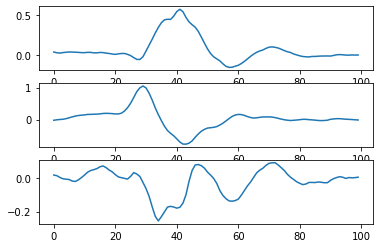

In [35]:
plot_single_trace(X_train[0])
# plot_single_trace(X_train[1])

(203, 700)
(203, 700)
(203, 700)


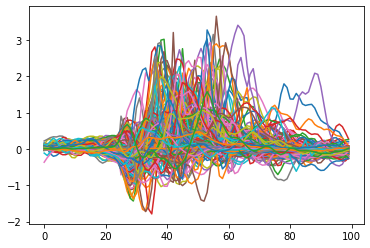

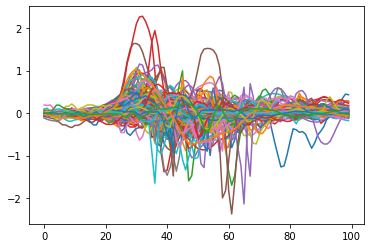

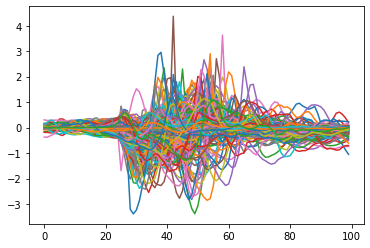

In [31]:
plot_trace(X_train, y_train, choose_gesture = 4, choose_channel = 0)
plot_trace(X_train, y_train, choose_gesture = 4, choose_channel = 1)
plot_trace(X_train, y_train, choose_gesture = 4, choose_channel = 2)

(203, 700)
(203, 700)
(211, 700)
(199, 700)


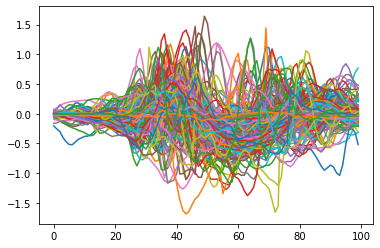

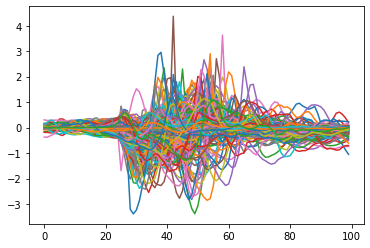

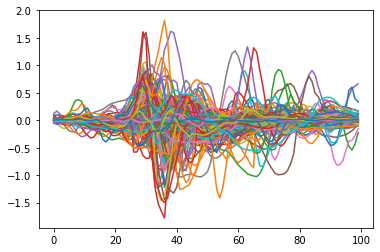

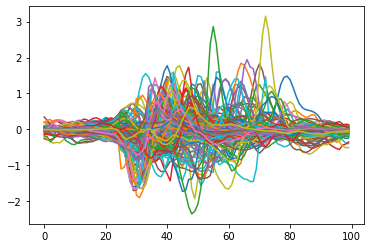

In [30]:
# train data for gesture
plot_trace(X_train, y_train, choose_gesture = 6, choose_channel = 2)
plot_trace(X_train, y_train, choose_gesture = 4, choose_channel = 2)
plot_trace(X_train, y_train, choose_gesture = 2, choose_channel = 2)
plot_trace(X_train, y_train, choose_gesture = 9, choose_channel = 2)

## Run Pipeline

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import joblib

In [24]:
def run_pipeline(x_train, x_test, y_train, y_test, n_comp=0, 
                 show_confusion=True, show_pca_gesture=True,
                 save_as=""):
    # Fit to data and predict gesture
    if n_comp == 0:
        n_pc = min(x_train.shape[0], x_train.shape[1])
    else:
        n_pc = n_comp
    clf = make_pipeline(StandardScaler(), PCA(n_components=n_pc), SVC())
    clf.fit(x_train, y_train)
    pred_test = clf.predict(x_test)
    acc = accuracy_score(y_test, pred_test)
    
    if (save_as != ""):
        joblib.dump(clf, save_as)
        print(f"Saved model to {save_as}")
    
    if (show_confusion):
        # print accuracy
        print("Prediction accuracy for test dataset")
        print(f"{acc:.2%}")

        # visualize confusion matrirx
        cm = confusion_matrix(y_test, pred_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot()
        plt.show()

        # visualize pca
        scaler = clf.named_steps["standardscaler"]
        x_train_proj = scaler.transform(x_train)
        pca = clf.named_steps["pca"]
        x_train_proj = pca.transform(x_train_proj)

    if (show_pca_gesture):
        # plot train gesture
        fig, ax = plt.subplots(figsize=FIG_SIZE)
        scatter = ax.scatter(
                x=x_train_proj[:, 0],
                y=x_train_proj[:, 1],
                c=y_train,
                cmap="tab20",
            )
        # produce a legend with the unique colors from the scatter
        legend = ax.legend(*scatter.legend_elements(prop="colors"),
                            loc="lower left", title="Gestures")
        ax.add_artist(legend)
        
    return acc

Saved model to pca_svm_train_model.pkl
Prediction accuracy for test dataset
75.49%


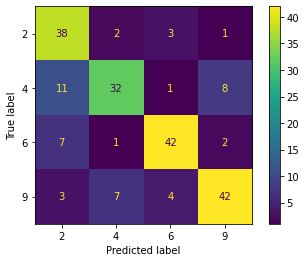

0.7549019607843137

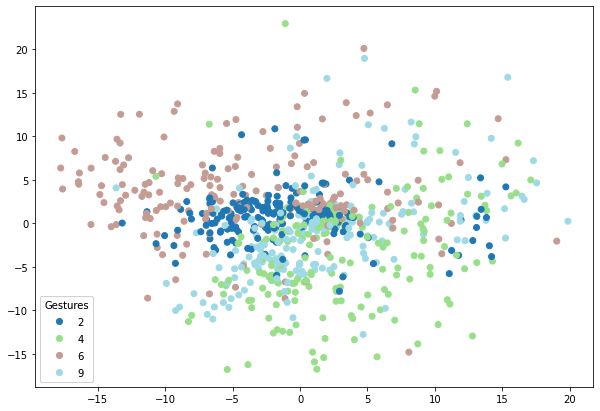

In [25]:
# reshape data to be gestures x ?
# accuracy --> 0.7549019607843137%
run_pipeline(X_train[:, 0:300], X_test[:, 0:300], 
             y_train, y_test, save_as="pca_svm_train_model.pkl")

## Test Loading and Predicting

In [39]:
clf = joblib.load("pca_svm_train_model.pkl")
pred_test = clf.predict(X_test[:, 0:300])
acc = accuracy_score(y_test, pred_test)
acc

0.7549019607843137

In [28]:
data[0][0:100]

array([-2.42073881e-03, -9.73605178e-03, -1.41230421e-02, -1.03999628e-02,
       -9.18538682e-03, -4.02483996e-03, -7.13068875e-04, -1.19833497e-03,
       -2.17013131e-03, -6.92549627e-04, -1.66415155e-03,  2.94271595e-04,
        1.56714697e-04,  4.86146193e-03,  1.34273814e-02,  3.26562696e-03,
       -2.42535796e-04,  7.46147661e-03,  1.79373417e-02, -4.02702775e-04,
       -5.11503518e-02, -5.95117100e-02, -7.18969405e-02, -1.14790812e-01,
       -2.05891356e-01, -3.27667385e-01, -3.92600983e-01, -3.33029717e-01,
       -1.84955508e-01, -1.27675548e-01, -1.58416167e-01, -1.83707088e-01,
       -1.38353899e-01, -7.85531700e-02, -5.63355908e-02, -5.67402411e-03,
        4.29057628e-02,  9.65232551e-02,  1.82200134e-01,  2.87311167e-01,
        3.94117177e-01,  4.70934033e-01,  5.86173952e-01,  8.67354989e-01,
        1.18496907e+00,  1.48502886e+00,  1.73495948e+00,  1.79951608e+00,
        1.66668463e+00,  1.38695955e+00,  1.10125744e+00,  9.19318736e-01,
        8.34544659e-01,  